In [1]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
import pandas as pd
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
import time
from selenium.common.exceptions import StaleElementReferenceException

# Login to your Instagram Handle Submit with sample username and password

In [182]:
driver=webdriver.Chrome(executable_path="C:\webdriver\chromedriver")

In [183]:
driver.get("https://www.instagram.com/")

In [184]:
inpt=driver.find_element_by_tag_name("input")

In [185]:
inpt.send_keys("SAMPLE_USERNAME")

In [186]:
pa=driver.find_element_by_name("password")

In [187]:
pa.send_keys("SAMPLE_PASSWORD")

In [188]:
pa.submit()

In [9]:
# THIS IS THE FIRST STEP WHICH WE HAVE TO PERFORM, WE HAVE TO LOGIN TO THE INSTAGRAM

# Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.
# From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers
# Now Find the number of posts these handles have done in the previous 3 days.
# Depict this information using a suitable graph.


In [30]:
# NOW I AM OPENING THE INSTAGRAM HANDLE CALLED AS FOOD
def searchh(text):
    sear=driver.find_element_by_xpath("//div[@class='LWmhU _0aCwM']/input")
    sear.send_keys(text)
    time.sleep(3)
    #dilse=driver.find_element_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
    #dilse.click()
searchh("food")

In [31]:
# JUST TO SCROLL WE ARE WRITING THIS FUNCTION
def scrollto():
    yesss=driver.execute_script("return document.getElementsByClassName('fuqBx ')[0].scrollHeight;")
    driver.execute_script("document.getElementsByClassName('fuqBx ')[0].scrollTo(0,arguments[0]);",yesss)
    
scrollto()     

In [ ]:
# THESE ARE THE HANDLES WHICH WILL GIVE YOU 10 FOOD HANDLE NAMES
def get10Handles():
    count=0
    allfoodhandles=driver.find_elements_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
    while True:
        try:
            strr=allfoodhandles[count].text
            print(strr)
            count=count+1
            if count==10:
                break
        except IndexError:
            pass
    return

get10Handles()
    
    

In [43]:
# THESE ARE THE HANDLES WHICH WILL GIVE YOU 10 FOOD HANDLE NAMES
def gettop5Handles():
    d={}
    count=0
    #allfoodhandles=driver.find_elements_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
    #print(allfoodhandles)
    while True:
        try:
            time.sleep(2)
            allfoodhandles=driver.find_elements_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
            strr=allfoodhandles[count].get_attribute('innerHTML')
            #dilse=driver.find_element_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
            #print(allfoodhandles[count])
            allfoodhandles[count].click()
            #dilse.click()
            follow=driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/ul/li[2]/a/span")
            follow=follow.get_attribute('innerHTML')
            follow=str(follow)
            #print(follow)
            if 'k' in follow:
                follow=follow.replace('k','')
                follow=float(follow)*1000
            elif 'm' in follow:
                follow=follow.replace('m','')
                follow=float(follow)*1000000  
            else:
                follow=follow.replace(',','')
  
                follow=float(follow)
            d[strr]=follow
            time.sleep(2)
            count=count+1
            sear=driver.find_element_by_xpath("//div[@class='LWmhU _0aCwM']/input")
            sear.send_keys(Keys.ENTER)
            time.sleep(5)
            if count==11:
                break
            #print(d)
        except IndexError:
            pass
    return d

dic=gettop5Handles()
    

In [44]:
# HERE ARE THE 10 HANDLES AND THERE FOLLOWERS
print(dic)

{'foodistamysuru': 30600.0, 'mysore_foodaholic': 704.0, 'tindibandi_mysuru': 122.0, 'yourfoodlab': 1600000.0, 'bangalore_food_girl': 8456.0, 'foodie_kannadathi': 9561.0, 'foodstorieswithus': 4582.0, 'mysuru_street_foodies': 19600.0, 'mysurufood': 17300.0, 'foodloversindia': 78700.0, 'mysurufoodie': 60300.0}


In [45]:
# NOW WE HAVE TO TAKE 5 FOLLOWERS IN THIS

In [46]:
values=list(dic.values())

In [47]:
values.sort()

In [48]:
print(values[::-1])
values=values[::-1]

[1600000.0, 78700.0, 60300.0, 30600.0, 19600.0, 17300.0, 9561.0, 8456.0, 4582.0, 704.0, 122.0]


In [49]:
top5handles=[]
top5follow=[]
for v in values:
    for e in dic.keys():
        if dic[e]==v:
            #print(v)
            #print(dic[e])
            #print(e)
            top5handles.append(e)
            top5follow.append(v)
            break
print(top5handles[0:5])
print(top5follow[0:5])

# THESE ARE THE TOP 5 HANDLES WITH THEIR FOLLOWERS
print('HANDLES','   ','FOLLOWERS')
for i in range(5):
    print(top5handles[i],' : ',top5follow[i])

['yourfoodlab', 'foodloversindia', 'mysurufoodie', 'foodistamysuru', 'mysuru_street_foodies']
[1600000.0, 78700.0, 60300.0, 30600.0, 19600.0]
HANDLES     FOLLOWERS
yourfoodlab  :  1600000.0
foodloversindia  :  78700.0
mysurufoodie  :  60300.0
foodistamysuru  :  30600.0
mysuru_street_foodies  :  19600.0


In [50]:
top5handles=top5handles[0:5]
top5follow=top5follow[0:5]

# Now Find the number of posts these handles have done in the previous 3 days.
# Depict this information using a suitable graph

In [60]:
c={}
count=0
pcount=0
while True:
    try:
        sear=driver.find_element_by_xpath("//div[@class='LWmhU _0aCwM']/input")
        sear.send_keys(top5handles[count])
        #count=count+1
        time.sleep(3)
        dilse=driver.find_element_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
        dilse.click()
        time.sleep(5)
        cm=driver.find_elements_by_xpath("//div[@class='_9AhH0']")
        for e in cm:
            e.click()
            time.sleep(4)
            tii=driver.find_element_by_xpath("//time[@class='_1o9PC Nzb55']")
            akk=tii.get_attribute('innerHTML')
            akk=akk.split()
            if 'minutes' in akk or 'seconds' in akk or int(akk[0])<=3:
                pcount=pcount+1
            else:
                cl=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
                cl.click()
                break
            time.sleep(4)
            cl=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
            cl.click()
            time.sleep(4)
        c[top5handles[count]]=pcount 
        count=count+1
        #print(c)
    except IndexError:
        break
       
    
    

In [61]:
# THESE MUCH OF TIMES THE TOP 5 HANDLES HAVE POSTED IN THIER INSTAGRAM
print(c)

{'yourfoodlab': 3, 'foodloversindia': 3, 'mysurufoodie': 7, 'foodistamysuru': 7, 'mysuru_street_foodies': 8}


In [65]:
hand=c.keys()
pos=c.values()

In [66]:
print(hand)
print(pos)

dict_keys(['yourfoodlab', 'foodloversindia', 'mysurufoodie', 'foodistamysuru', 'mysuru_street_foodies'])
dict_values([3, 3, 7, 7, 8])


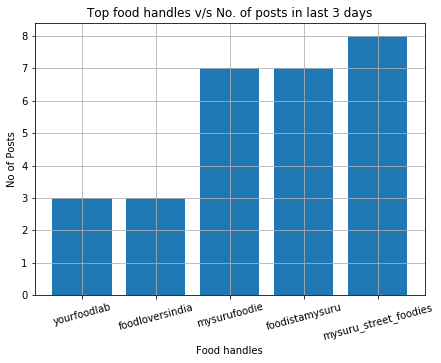

In [67]:
# THIS IS IN INTERMS OF BAR GRAPH
import matplotlib.pyplot as plt

plt.figure( figsize=(7, 5))
plt.grid()
plt.bar(hand, pos)
plt.xticks(rotation = 15)
plt.title('Top food handles v/s No. of posts in last 3 days')
plt.xlabel('Food handles')
plt.ylabel('No of Posts')
plt.show()

# Your friend also needs a list of hashtags that he should use in his posts.
# Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.
# Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.
# Create a csv file with two columns : the word and its frequency
# Now, find the hashtags that were most popular among these bloggers
# Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

In [ ]:
# GRABBING HASHTAGS OF 10 POSTS OF EACH HANDLE

In [73]:
hs=driver.find_elements_by_xpath('//a[@class=" xil3i"]')

In [74]:
for e in hs:
    print(e.text)


#recipe
#foodiesofinstagram
#kathal
#kathalrecipe
#foodporn
#foodies
#recipeoftheday
#foodstylist
#foodlover
#foodpics
#indianfood
#indiaclicks
#yourfoodlab
#sanjyotkeer


In [78]:
def scroll():
    driver.execute_script('window.scrollBy(0,1500);')

In [83]:
hashtags={}
count=0
pcount=0
while True:
    try:
        sear=driver.find_element_by_xpath("//div[@class='LWmhU _0aCwM']/input")
        sear.send_keys(top5handles[count])
        #count=count+1
        time.sleep(3)
        #scroll()
        driver.execute_script('window.scrollBy(0,1500);')
        time.sleep(4)
        dilse=driver.find_element_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
        dilse.click()
        time.sleep(5)
        cm=driver.find_elements_by_xpath("//div[@class='_9AhH0']")
        cm=cm[0:10]
        for e in cm:
            e.click()
            time.sleep(4)
            hs=driver.find_elements_by_xpath('//a[@class=" xil3i"]')
            time.sleep(4)
            for e in hs:
                if e.text in hashtags:
                    hashtags[e.text]+=1
                else:
                    hashtags[e.text]=1
            time.sleep(4)
            cl=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
            cl.click()
            time.sleep(4)  
        #c[top5handles[count]]=pcount 
        count=count+1
        #print(c)
    except IndexError:
        break

In [84]:
print(hashtags)

{'#mango': 2, '#mangoseason': 2, '#mangolover': 1, '#mangomango': 1, '#mangorecipes': 1, '#food': 22, '#foodstagram': 19, '#foodphotography': 10, '#foodstylist': 5, '#foodiesofinstagram': 6, '#foodshare': 1, '#sanjyotkeer': 8, '#foodgram': 1, '#yourfoodlab': 5, '#foodphotos': 1, '#indiancuisine': 4, '#frankie': 1, '#foodporn': 23, '#streetfood': 8, '#frankierecipe': 1, '#paneer': 1, '#paneerrecipes': 1, '#roll': 1, '#streetfoodindia': 1, '#MoreTogether': 1, '#DuniyaTumhaareSaathHai': 1, '#recipe': 5, '#kathal': 2, '#kathalrecipe': 2, '#foodies': 9, '#recipeoftheday': 3, '#foodlover': 20, '#foodpics': 4, '#indianfood': 3, '#indiaclicks': 2, '#pasta': 1, '#spagetti': 1, '#butterchickenteam': 1, '#butterchicken': 1, '#nonveg': 1, '#dahivada': 2, '#yummyfood': 2, '#DigSwirlSpread': 1, '#EpigamiaGheeSpread': 1, '#thandai': 1, '#thandairecipe': 1, '#holifestival': 1, '#holi': 1, '#holicelebration': 1, '#chocolate': 1, '#summerseason': 1, '#staytuned': 2, '#gourmetontheroad': 9, '#foodloverst

In [85]:
sorted_hash = sorted(hashtags.items(), key = lambda kv:kv[1], reverse = True)
sorted_hash

[('#foodporn', 23),
 ('#food', 22),
 ('#mysuru', 22),
 ('#foodlover', 20),
 ('#foodstagram', 19),
 ('', 17),
 ('#foodie', 17),
 ('#foodblogger', 17),
 ('#foodfood', 15),
 ('#mysuru_street_foodie', 13),
 ('#mysore', 12),
 ('#foodphotography', 10),
 ('#mysurufoodie', 10),
 ('#bornoninstagram', 10),
 ('#mysorefoodie', 10),
 ('#simplymsf', 10),
 ('#mysurufood', 10),
 ('#nkmpitstop', 10),
 ('#foodies', 9),
 ('#gourmetontheroad', 9),
 ('#foodloverstv', 9),
 ('#truthinfood', 9),
 ('#karnatakafood', 9),
 ('#yummyinmytummy', 9),
 ('#goodfood', 9),
 ('#ifoundawesome', 9),
 ('#trellfood', 9),
 ('#shotonphone', 9),
 ('#eeeeeats', 9),
 ('#zingyzest', 9),
 ('#sanjyotkeer', 8),
 ('#streetfood', 8),
 ('#foodloversindia', 8),
 ('#tasty', 8),
 ('#linkinstory', 7),
 ('#instafood', 7),
 ('#yummy', 7),
 ('#instagood', 7),
 ('#love', 7),
 ('#delicious', 7),
 ('#follow', 7),
 ('#like', 7),
 ('#healthyfood', 7),
 ('#homemade', 7),
 ('#dinner', 7),
 ('#foodgasm', 7),
 ('#photooftheday', 7),
 ('#cooking', 7),
 

In [86]:
import pandas as pd
#creating a dataframe
df = pd.DataFrame(sorted_hash, columns=['Word','Frequency'])

In [87]:
df

,Word,Frequency
0,#foodporn,23
1,#food,22
2,#mysuru,22
3,#foodlover,20
4,#foodstagram,19
...,...,...
215,#pastries,1
216,#momos,1
217,#tea,1
218,#lemontea,1


In [88]:
hashtags_csv=df.to_csv('frequency_hashtags.csv', index = False )


In [89]:
df

,Word,Frequency
0,#foodporn,23
1,#food,22
2,#mysuru,22
3,#foodlover,20
4,#foodstagram,19
...,...,...
215,#pastries,1
216,#momos,1
217,#tea,1
218,#lemontea,1


In [93]:
c=0
for ind in df.index:
    if c<11:
        if ind==5:
            continue
        h=df["Word"][ind]
        f=df['Frequency'][ind]
        print(h," : ",f)
        c=c+1

#foodporn  :  23
#food  :  22
#mysuru  :  22
#foodlover  :  20
#foodstagram  :  19
#foodie  :  17
#foodblogger  :  17
#foodfood  :  15
#mysuru_street_foodie  :  13
#mysore  :  12
#foodphotography  :  10


In [94]:
#creating lists
c=0
word=[]
fr=[]
for ind in df.index:
    if c<5:
        h=df["Word"][ind]
        f=df['Frequency'][ind]
        word.append(h)
        fr.append(f)
        c=c+1

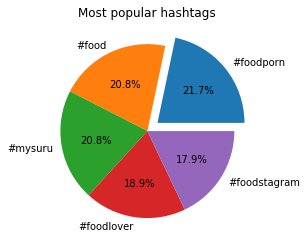

In [123]:
sizes=fr
labels=word
explode=[0.15,0,0,0,0]
plt.pie(sizes,labels=labels,explode=explode,autopct="%.1f%%")
plt.title("Most popular hashtags")
plt.show()

In [97]:
# THIS IS THE PIE CHART FOR THAT

# You need to also calculate average followers : likes ratio for the obtained handles.
# Followers : Likes ratio is calculated as follows:
# Find out the likes of the top 10 posts of the 5 handles obtained earlier.
# Calculate the average likes for a handle.
# Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
# Create a bar graph to depict the above obtained information.

In [124]:

count=0
handlefollow=[]
followers=[]
totallikes=[]
while True:
    try:
        eachlike=[]
        sear=driver.find_element_by_xpath("//div[@class='LWmhU _0aCwM']/input")
        sear.send_keys(top5handles[count])
        #count=count+1
        time.sleep(3)
        #scroll()
        driver.execute_script('window.scrollBy(0,1500);')
        time.sleep(4)
        dilse=driver.find_element_by_xpath("//div[@class='_7UhW9   xLCgt       qyrsm KV-D4          uL8Hv         ']")
        time.sleep(4)
        dilse.click()
        time.sleep(5)
        cm=driver.find_elements_by_xpath("//div[@class='_9AhH0']")
        cm=cm[0:20]
        print(top5handles[count])
        follo=driver.find_element_by_xpath("//*[@id='react-root']/section/main/div/header/section/ul/li[2]/a/span")
        fo=follo.get_attribute('innerHTML')
        followers.append(fo)
        handlefollow.append(top5handles[count])
        pcount=0
        #print(cm)
        i=0
        while i<20:
            cm[i].click()
            if pcount==10:
                time.sleep(4)
                cl=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
                cl.click()
                time.sleep(4)
                break
            time.sleep(4)
            try:
                li=driver.find_element_by_xpath("/html/body/div[5]/div[2]/div/article/div[3]/section[2]/div/div/a/span")
            except NoSuchElementException:
                i=i+1
                cl=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
                cl.click()
                time.sleep(4)
                continue
            time.sleep(2)
            likes=li.get_attribute('innerHTML')
            likes=likes.replace(',','')
            likes=float(likes)
            print(likes)
            eachlike.append(likes)
            time.sleep(4)
            cl=driver.find_element_by_xpath("/html/body/div[5]/div[3]/button")
            cl.click()
            time.sleep(4)
            i=i+1
            pcount=pcount+1
        #c[top5handles[count]]=pcount 
        count=count+1
        totallikes.append(eachlike)
        #print(c)
    except IndexError:
        break

yourfoodlab
16015.0
34971.0
14523.0
29663.0
26982.0
23964.0
33183.0
39683.0
27843.0
18375.0
foodloversindia
1170.0
929.0
2074.0
2023.0
1186.0
1321.0
1085.0
1741.0
4717.0
6187.0
mysurufoodie
4138.0
4834.0
2547.0
8414.0
5294.0
5753.0
4484.0
4118.0
5107.0
2456.0
foodistamysuru
1288.0
2963.0
2548.0
1938.0
1777.0
1733.0
1323.0
1253.0
1541.0
2095.0
mysuru_street_foodies
1946.0
1017.0
1986.0
2740.0
3670.0
1454.0
8031.0
4540.0
4018.0
19327.0


In [125]:
print(handlefollow)


['yourfoodlab', 'foodloversindia', 'mysurufoodie', 'foodistamysuru', 'mysuru_street_foodies']


In [126]:
print(followers)

['1.6m', '78.7k', '60.4k', '30.6k', '19.6k']


In [127]:
print(totallikes)

[[16015.0, 34971.0, 14523.0, 29663.0, 26982.0, 23964.0, 33183.0, 39683.0, 27843.0, 18375.0], [1170.0, 929.0, 2074.0, 2023.0, 1186.0, 1321.0, 1085.0, 1741.0, 4717.0, 6187.0], [4138.0, 4834.0, 2547.0, 8414.0, 5294.0, 5753.0, 4484.0, 4118.0, 5107.0, 2456.0], [1288.0, 2963.0, 2548.0, 1938.0, 1777.0, 1733.0, 1323.0, 1253.0, 1541.0, 2095.0], [1946.0, 1017.0, 1986.0, 2740.0, 3670.0, 1454.0, 8031.0, 4540.0, 4018.0, 19327.0]]


In [129]:
follower=[]
for e in followers:
    if 'm' in e:
        e=e.replace('m','')
        e=float(e)*1000000
        follower.append(e)
    else:
        e=e.replace('k','')
        e=float(e)*1000
        follower.append(e)
print(follower)
    

[1600000.0, 78700.0, 60400.0, 30600.0, 19600.0]


In [138]:
# TOTAL LIKES FOR EACH HANDLE

In [140]:

count=0
for li in totallikes:
    an=sum(li)
    #average_likes.append(an)
    #avgh[handlefollow[count]]=an
    print(handlefollow[count],' : ',int(an))
    count=count+1

yourfoodlab  :  265202
foodloversindia  :  22433
mysurufoodie  :  47145
foodistamysuru  :  18459
mysuru_street_foodies  :  48729


In [ ]:
# AVERAGE LIKES FOR EACH HANDLE

In [143]:
avgh={}
average_likes=[]
count=0
for li in totallikes:
    an=sum(li)/10
    average_likes.append(an)
    avgh[handlefollow[count]]=an
    count=count+1
    
    

In [144]:
for e,i in avgh.items():
    print(e, ' : ', i)

yourfoodlab  :  26520.2
foodloversindia  :  2243.3
mysurufoodie  :  4714.5
foodistamysuru  :  1845.9
mysuru_street_foodies  :  4872.9


In [ ]:
# AVERAGE LIKE RATIO FOR EACH HANDLE

In [ ]:
The average likes for a handle.
Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.
Create a bar graph to depict the above obtained information.

In [145]:
print(average_likes)

[26520.2, 2243.3, 4714.5, 1845.9, 4872.9]


In [147]:
print(follower)

[1600000.0, 78700.0, 60400.0, 30600.0, 19600.0]


In [148]:
ratio=[]
for i in range(5):
    answer=follower[i]/average_likes[i]
    ratio.append(answer)
    print(handlefollow[i], ' : ',answer)
    

yourfoodlab  :  60.33137004999962
foodloversindia  :  35.08224490705656
mysurufoodie  :  12.811538869445329
foodistamysuru  :  16.577279375914188
mysuru_street_foodies  :  4.02224548010425


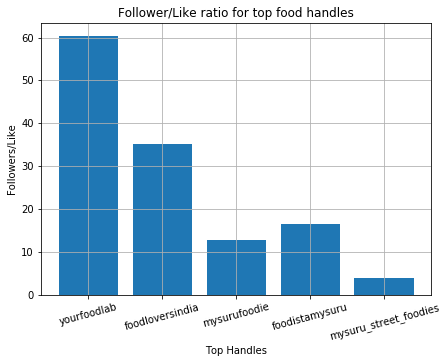

In [149]:
import matplotlib.pyplot as plt

plt.figure( figsize=(7, 5))
plt.bar(handlefollow,ratio)
plt.grid()
plt.title("Follower/Like ratio for top food handles")
plt.xlabel("Top Handles")
plt.ylabel("Followers/Like")
plt.xticks(rotation=15)
plt.show()

In [150]:
#THIS WILL SHOW YOU THE BAR GRAPH OF TOP 5 HANDLES

In [151]:
#THANKU